In [209]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import json

In [210]:
files = !ls -t *.json
files

['iterations_1e-1_ell_only_20240830-1404.json',
 'iterations_1e-1_ell_only_20240830-1305.json',
 'iterations_1e-1_ell_only_20240830-1050.json',
 'iterations_1e-1_ell_only_20240830-1030.json',
 'iterations_1e-1_ell_only_20240830-0943.json',
 'iterations_1e-1_ell_only_20240829-1408.json',
 'iterations_1e-1_ell_only_20240829-1344.json',
 'iterations_1e-1_ell_only_20240829-1328.json',
 'iterations_1e-1_ell_only_20240829-1317.json',
 'ite_2_0.5_20240829-1318.json',
 'ite_2_0.5_20240829-1316.json',
 'ite_2_0.5_20240829-1313.json',
 'ite_2_0.5_20240829-1309.json',
 'iterations_1e-1_ell_only_20240829-1136.json',
 'iterations_1e-1_ell_only_20240829-1050.json',
 'iterations_1e-1_ell_only_20240828-1857.json',
 'iterations_1e-1_ell_only_20240828-1121.json',
 'iterations_1e-1_ell_only_20240828-1034.json',
 'iterations_1e-1_ell_only_20240828-1016.json',
 'iterations_1e-1_ell_only_20240828-0925.json',
 'iterations_1e-1_ell_only_20240827-1422.json',
 'iterations_1e-1_ell_only_20240827-1539.json',
 'it

# Load $\sigma_n$ dictionary

In [211]:
path = os.getcwd()
file = os.path.join(path,files[0])
with open(file, 'r') as f:
    data = json.load(f)

In [212]:
data

{'pde': {'dim': 5,
  'kappa': [0.0,
   1.0,
   0.8,
   0.6,
   0.4,
   0.5,
   0.3,
   0.2,
   0.1,
   0.7,
   1.0,
   0.8,
   0.6,
   0.4,
   0.5,
   0.3,
   0.2,
   0.1,
   0.7,
   1.0,
   0.8,
   0.6,
   0.4,
   0.5,
   0.3,
   0.2,
   0.1,
   0.7],
  'theta': [0.0,
   0.1,
   0.2,
   0.3,
   0.4,
   0.5,
   0.4,
   0.3,
   0.2,
   0.1,
   0.1,
   0.2,
   0.3,
   0.4,
   0.5,
   0.4,
   0.3,
   0.2,
   0.1,
   0.1,
   0.2,
   0.3,
   0.4,
   0.5,
   0.4,
   0.3,
   0.2,
   0.1],
  'nu': [0.0,
   0.2,
   0.15,
   0.11,
   0.12,
   0.1,
   0.13,
   0.14,
   0.14,
   0.1,
   0.2,
   0.15,
   0.11,
   0.12,
   0.1,
   0.13,
   0.14,
   0.14,
   0.1,
   0.2,
   0.15,
   0.11,
   0.12,
   0.1,
   0.13,
   0.14,
   0.14,
   0.1],
  'lb': [0.0,
   0.6,
   1.11,
   0.12,
   0.13,
   0.15,
   0.11,
   0.12,
   0.13,
   0.15,
   1.15,
   1.11,
   0.12,
   0.13,
   0.15,
   0.11,
   0.12,
   0.13,
   0.15,
   1.15,
   1.11,
   0.12,
   0.13,
   0.15,
   0.11,
   0.12,
   0.13,
   0.15],
  'rho'

In [213]:
n = int(list(data.keys())[-1])
n

10

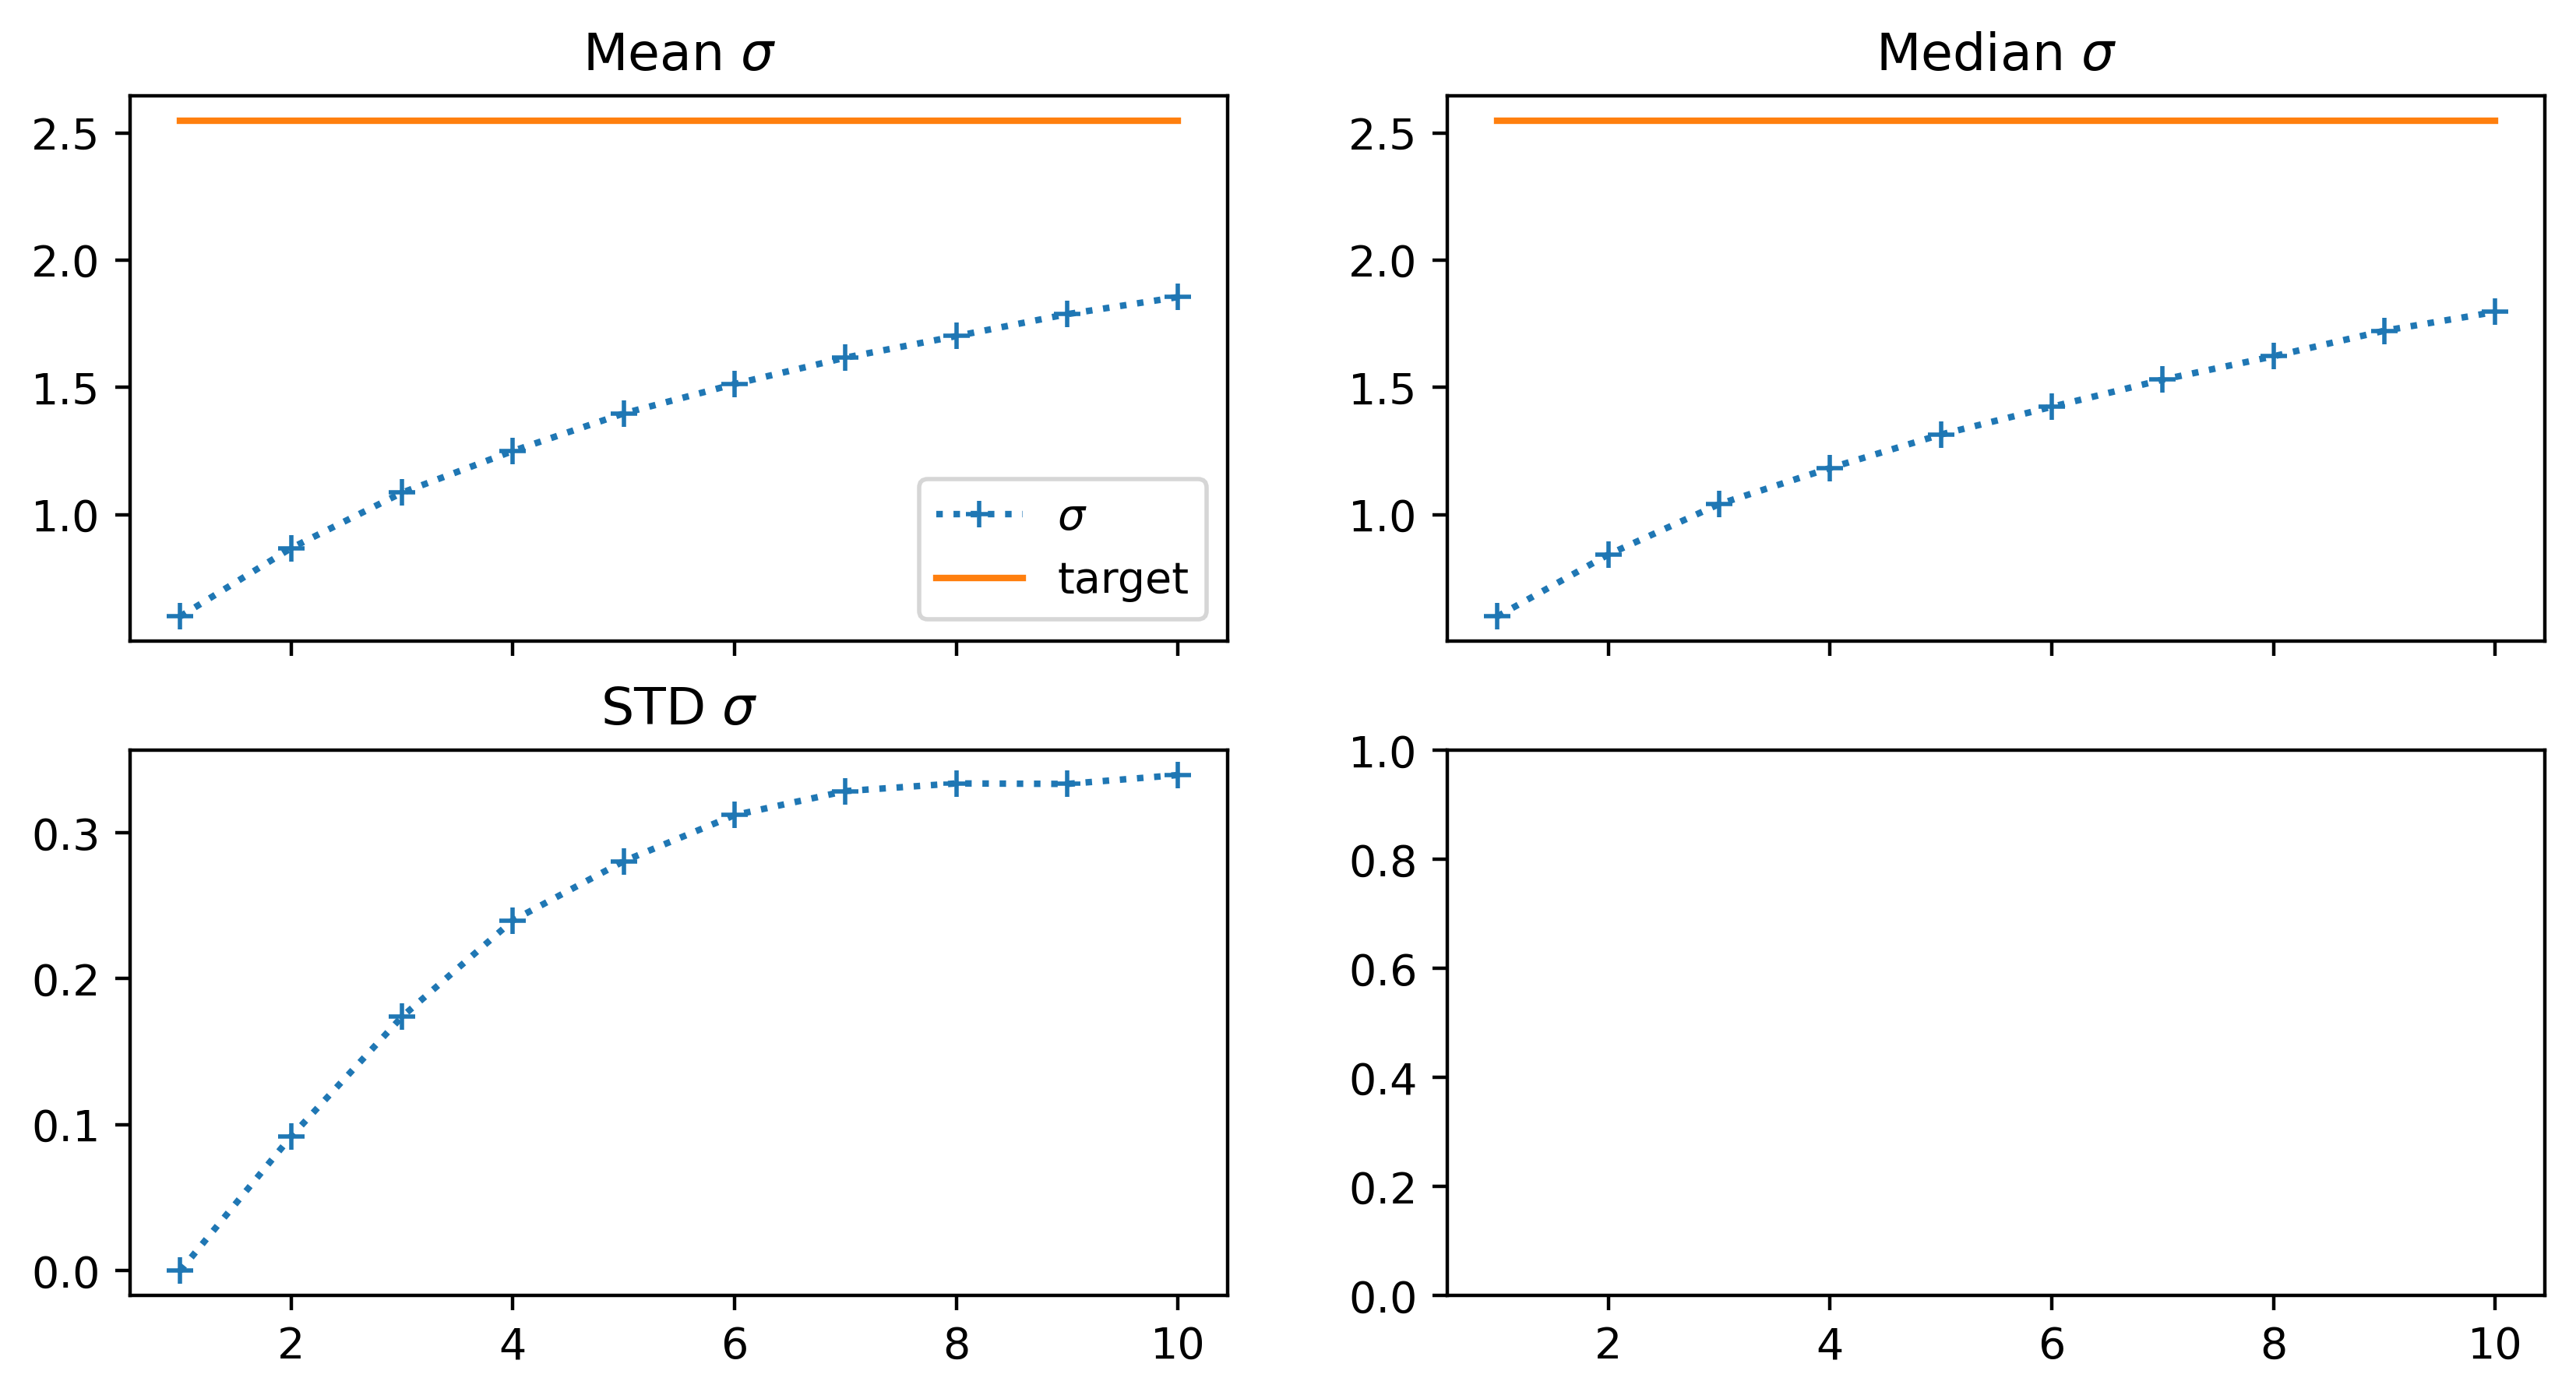

In [214]:
f , ax  = plt.subplots(2,2,figsize=(10,5),dpi=400,sharex = True);
for i in range(0,n):
    if i == 0:
        x0 = np.array([[i+1,data[str(i)]['sigma']['mean']]])
        x1 = np.array([[i+1,data[str(i)]['sigma']['median']]]) 
        x2 = np.array([[i+1,data[str(i)]['sigma']['std']]])        
    elif i == 1:
        x0 = np.concatenate((x0,np.array([[i+1,data[str(i)]['sigma']['mean']]])),axis=0)
        # y0 = np.array([[i+1,data[str(i)]['nabla u * ell']['mean']]])
        # z0 = np.array([[i+1,data[str(i)]['min(nabla u , ell)']['mean']]])
        x1 = np.concatenate((x1,np.array([[i+1,data[str(i)]['sigma']['median']]])),axis=0)
        # y1 = np.array([[i+1,data[str(i)]['nabla u * ell']['median']]])
        # z1 = np.array([[i+1,data[str(i)]['min(nabla u , ell)']['median']]])
        x2 = np.concatenate((x2,np.array([[i+1,data[str(i)]['sigma']['std']]])),axis=0)
        # y2 = np.array([[i+1,data[str(i)]['nabla u * ell']['std']]])
        # z2 = np.array([[i+1,data[str(i)]['min(nabla u , ell)']['std']]])
    else:
        x0 = np.concatenate((x0,np.array([[i+1,data[str(i)]['sigma']['mean']]])),axis=0)
        # y0 = np.concatenate((y0,np.array([[i+1,data[str(i)]['nabla u * ell']['mean']]])),axis=0)
        # z0 = np.concatenate((z0,np.array([[i+1,data[str(i)]['min(nabla u , ell)']['mean']]])),axis=0)
        x1 = np.concatenate((x1,np.array([[i+1,data[str(i)]['sigma']['median']]])),axis=0)
        # y1 = np.concatenate((y1,np.array([[i+1,data[str(i)]['nabla u * ell']['median']]])),axis=0)
        # z1 = np.concatenate((z1,np.array([[i+1,data[str(i)]['min(nabla u , ell)']['median']]])),axis=0)
        x2 = np.concatenate((x2,np.array([[i+1,data[str(i)]['sigma']['std']]])),axis=0)
        # y2 = np.concatenate((y2,np.array([[i+1,data[str(i)]['nabla u * ell']['std']]])),axis=0)
        # z2 = np.concatenate((z2,np.array([[i+1,data[str(i)]['min(nabla u , ell)']['std']]])),axis=0)
ax[0][0].plot(x0[:,0],x0[:,1],label = r'$\sigma$',linestyle=':', marker='+')
# ax[0][0].plot(y0[:,0],y0[:,1],label = r'$\ell\nabla u$',linestyle='-.', marker='*')
# ax[0][0].plot(z0[:,0],z0[:,1],label = r'$(-\nabla u) \vee(\nabla u \wedge \ell)$',linestyle='--', marker='o')
ax[0][0].plot(x0[:,0],data['optimal']*np.ones(x0.shape[0]),label='target');
ax[0][0].set_title(r'Mean $\sigma$');
# ax[0][0].set_xticks s([int(l) for l in x0[:,0]])
ax[0][1].plot(x1[:,0],x1[:,1],label = r'$\sigma$',linestyle=':', marker='+')
# ax[0][1].plot(y1[:,0],y1[:,1],label = r'$\nabla u \ell$',linestyle='-.', marker='*')
# ax[0][1].plot(z1[:,0],z1[:,1],label = r'$(-\nabla u) \vee(\nabla u \wedge \ell)$',linestyle='--', marker='o')
ax[0][1].plot(x1[:,0],data['optimal']*np.ones(x1.shape[0]),label='target');
ax[0][1].set_title(r'Median $\sigma$');
ax[1][0].plot(x2[:,0],x2[:,1],label = r'$\sigma$',linestyle=':', marker='+')
# ax[1][0].plot(y2[:,0],y2[:,1],label = r'$\ell\nabla u$',linestyle='-.', marker='*')
# ax[1][0].plot(z2[:,0],z2[:,1],label = r'$(-\nabla u) \vee(\nabla u \wedge \ell)$',linestyle='--', marker='o')
# ax[1][0].plot(x2[:,0],np.zeros(x0.shape[0]),label='target');
ax[1][0].set_title(r'STD $\sigma$');
ax[0][0].legend();

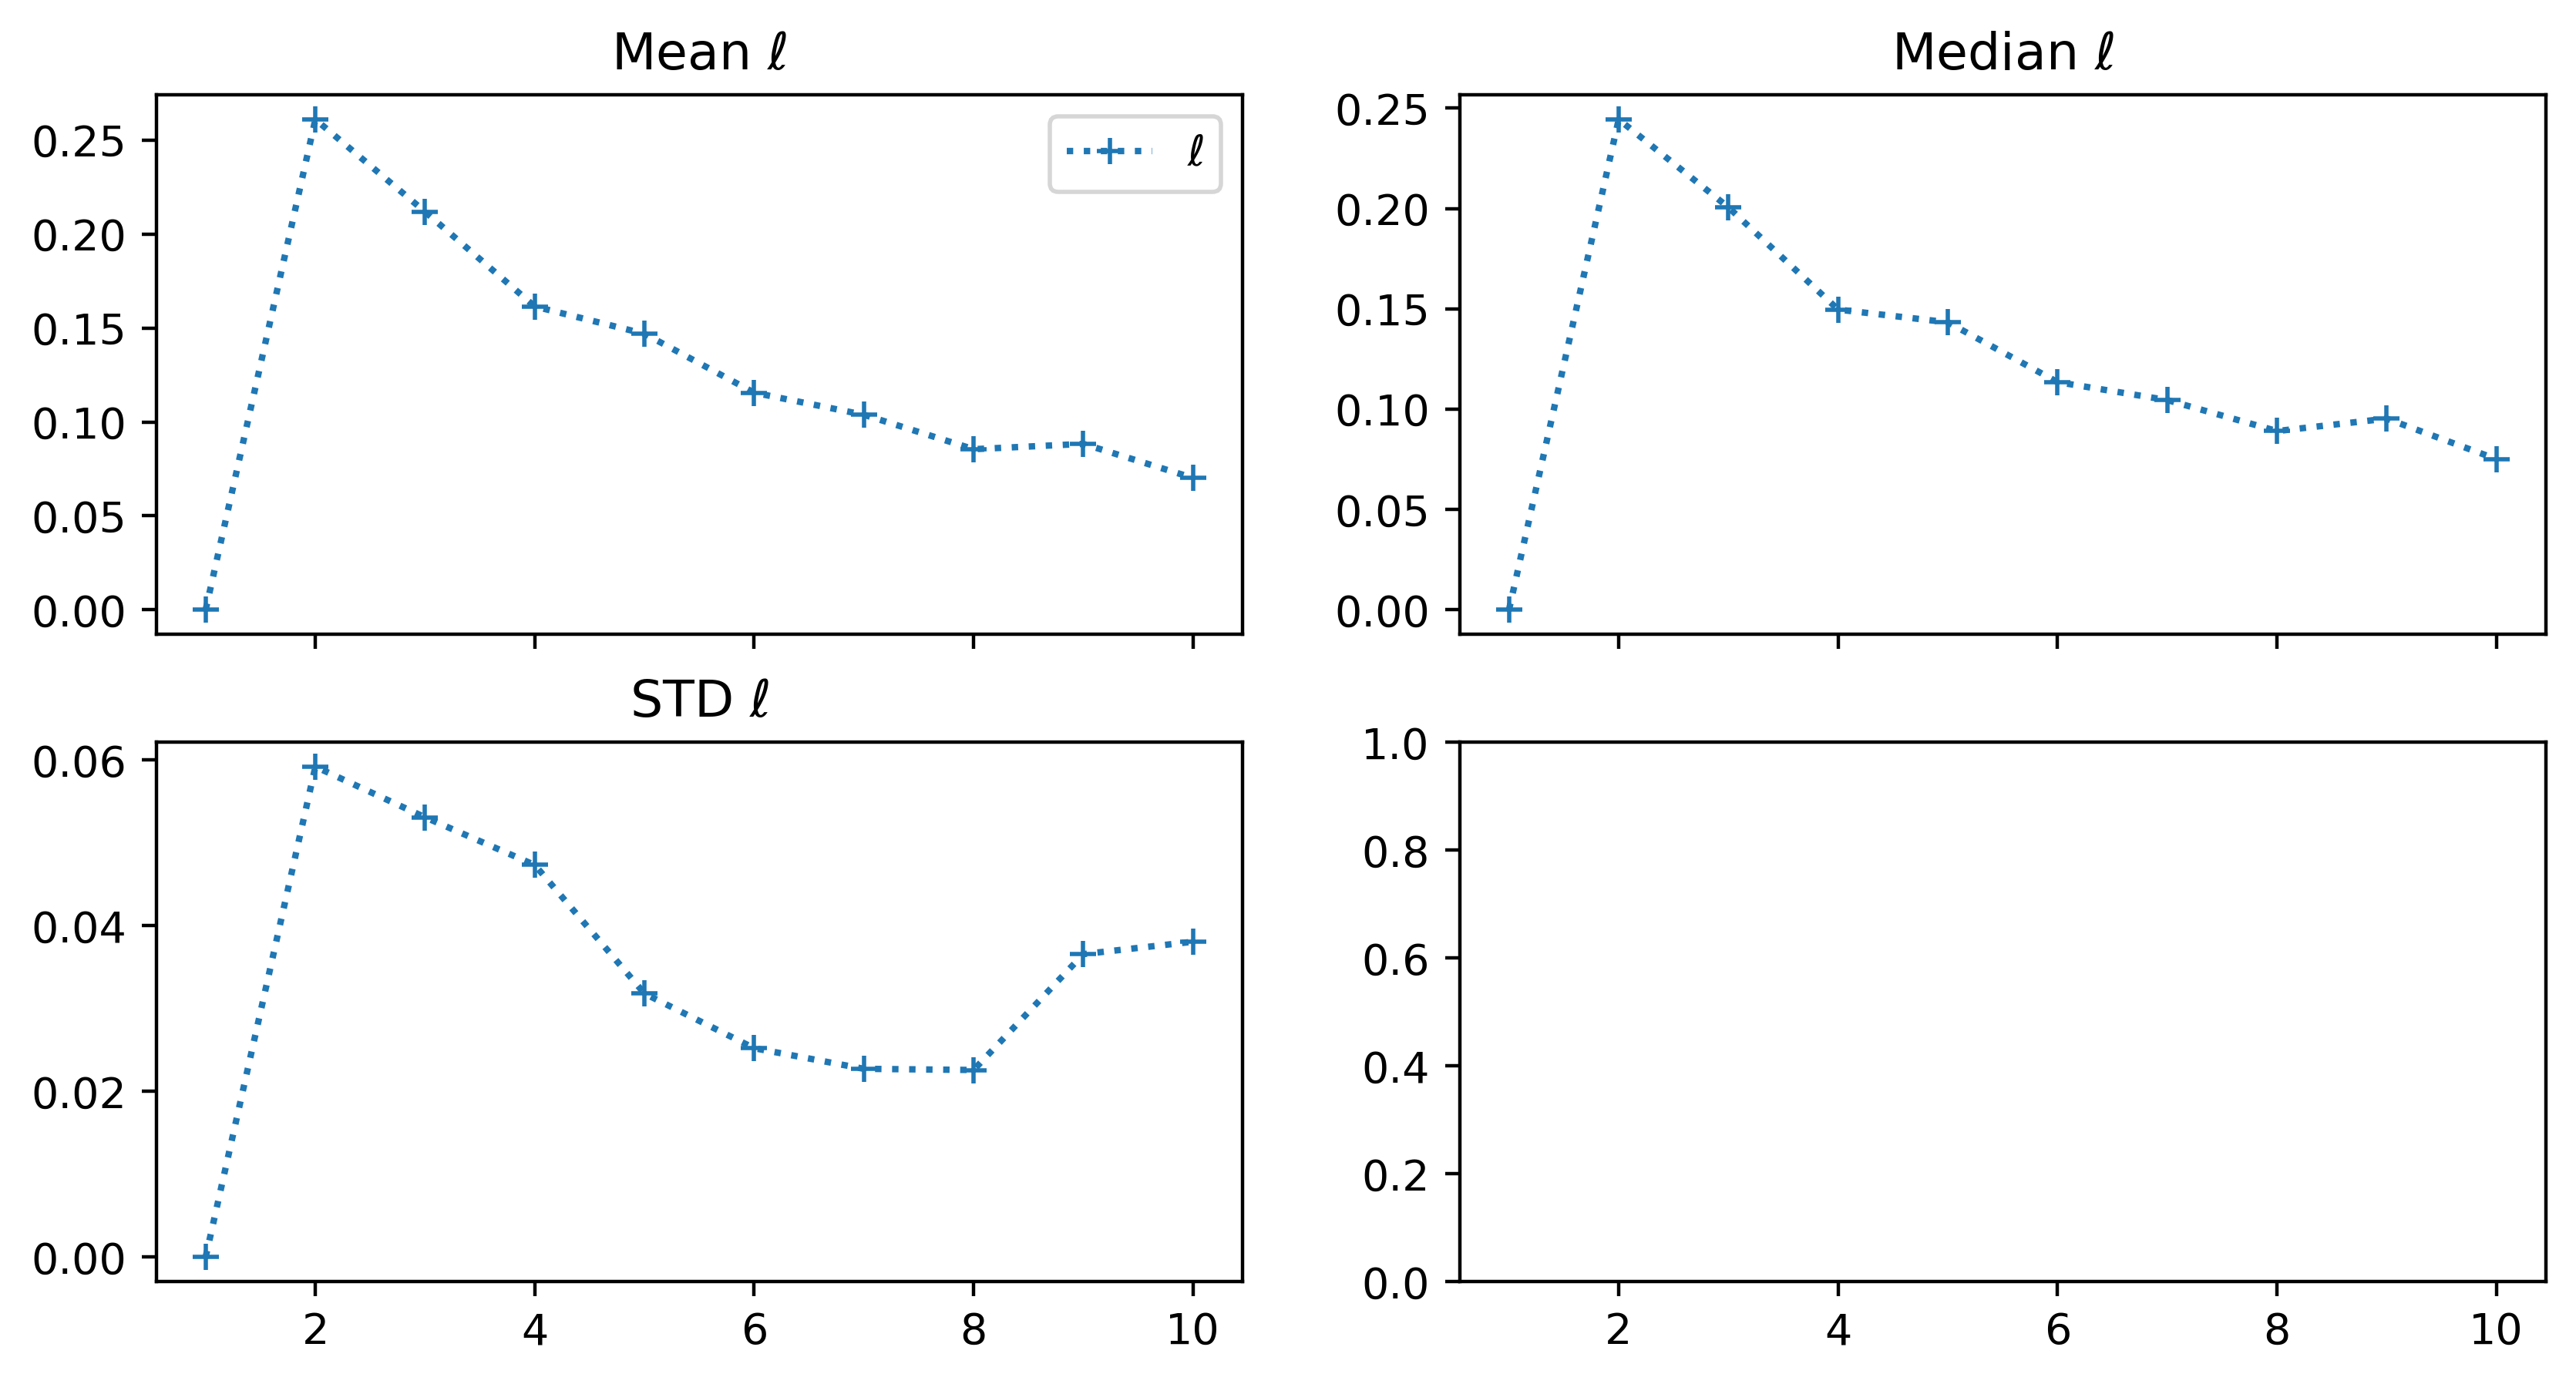

In [215]:
f , ax  = plt.subplots(2,2,figsize=(10,5),dpi=400,sharex = True);
for i in range(0,n):
    if i == 0:
        x0 = np.array([[i+1,data[str(i)]['ell']['mean']]])
        x1 = np.array([[i+1,data[str(i)]['ell']['median']]]) 
        x2 = np.array([[i+1,data[str(i)]['ell']['std']]])        
    elif i == 1:
        x0 = np.concatenate((x0,np.array([[i+1,data[str(i)]['ell']['mean']]])),axis=0)
        # y0 = np.array([[i+1,data[str(i)]['nabla u * ell']['mean']]])
        # z0 = np.array([[i+1,data[str(i)]['min(nabla u , ell)']['mean']]])
        x1 = np.concatenate((x1,np.array([[i+1,data[str(i)]['ell']['median']]])),axis=0)
        # y1 = np.array([[i+1,data[str(i)]['nabla u * ell']['median']]])
        # z1 = np.array([[i+1,data[str(i)]['min(nabla u , ell)']['median']]])
        x2 = np.concatenate((x2,np.array([[i+1,data[str(i)]['ell']['std']]])),axis=0)
        # y2 = np.array([[i+1,data[str(i)]['nabla u * ell']['std']]])
        # z2 = np.array([[i+1,data[str(i)]['min(nabla u , ell)']['std']]])
    else:
        x0 = np.concatenate((x0,np.array([[i+1,data[str(i)]['ell']['mean']]])),axis=0)
        # y0 = np.concatenate((y0,np.array([[i+1,data[str(i)]['nabla u * ell']['mean']]])),axis=0)
        # z0 = np.concatenate((z0,np.array([[i+1,data[str(i)]['min(nabla u , ell)']['mean']]])),axis=0)
        x1 = np.concatenate((x1,np.array([[i+1,data[str(i)]['ell']['median']]])),axis=0)
        # y1 = np.concatenate((y1,np.array([[i+1,data[str(i)]['nabla u * ell']['median']]])),axis=0)
        # z1 = np.concatenate((z1,np.array([[i+1,data[str(i)]['min(nabla u , ell)']['median']]])),axis=0)
        x2 = np.concatenate((x2,np.array([[i+1,data[str(i)]['ell']['std']]])),axis=0)
        # y2 = np.concatenate((y2,np.array([[i+1,data[str(i)]['nabla u * ell']['std']]])),axis=0)
        # z2 = np.concatenate((z2,np.array([[i+1,data[str(i)]['min(nabla u , ell)']['std']]])),axis=0)
ax[0][0].plot(x0[:,0],x0[:,1],label = r'$\ell$',linestyle=':', marker='+')
# ax[0][0].plot(y0[:,0],y0[:,1],label = r'$\ell\nabla u$',linestyle='-.', marker='*')
# ax[0][0].plot(z0[:,0],z0[:,1],label = r'$(-\nabla u) \vee(\nabla u \wedge \ell)$',linestyle='--', marker='o')
# ax[0][0].plot(x0[:,0],data['optimal']*np.ones(x0.shape[0]),label='target');
ax[0][0].set_title(r'Mean $\ell$');
# ax[0][0].set_xticks s([int(l) for l in x0[:,0]])
ax[0][1].plot(x1[:,0],x1[:,1],label = r'$\ell$',linestyle=':', marker='+')
# ax[0][1].plot(y1[:,0],y1[:,1],label = r'$\nabla u \ell$',linestyle='-.', marker='*')
# ax[0][1].plot(z1[:,0],z1[:,1],label = r'$(-\nabla u) \vee(\nabla u \wedge \ell)$',linestyle='--', marker='o')
# ax[0][1].plot(x1[:,0],data['optimal']*np.ones(x1.shape[0]),label='target');
ax[0][1].set_title(r'Median $\ell$');
ax[1][0].plot(x2[:,0],x2[:,1],label = r'$\ell$',linestyle=':', marker='+')
# ax[1][0].plot(y2[:,0],y2[:,1],label = r'$\ell\nabla u$',linestyle='-.', marker='*')
# ax[1][0].plot(z2[:,0],z2[:,1],label = r'$(-\nabla u) \vee(\nabla u \wedge \ell)$',linestyle='--', marker='o')
# ax[1][0].plot(x2[:,0],np.zeros(x0.shape[0]),label='target');
ax[1][0].set_title(r'STD $\ell$');
ax[0][0].legend();